# Telematics Data Analytics

    This notebook is for Internship at Xen.AI. The aim is to apply AI/ML on truck data to reduce the downtime/maintenance time by predicting Engine Health Score (EHS).
    We have to generate an equation and perform time series prediction for the EHS using available data.

    Data Credits  : Dr. Dmitry

In [2]:
import warnings                         #'do not disturb' mode
warnings.filterwarnings('ignore')

import numpy as np                      # vectors and matrices
import pandas as pd                     # tables and data manipulations
import matplotlib.pyplot as plt         # plots
import seaborn as sns                   # more plots

%matplotlib inline

In [3]:
data = pd.read_csv('telematics_data.csv')   # data importing

In [4]:
pd.options.display.max_rows = 200
pd.options.display.max_columns =50     #to show max rows and columns

In [5]:
data.head()

,year,month,day,vin,wmi,engine_cd,device_type,msg_ts,vin_utc_key,packet_id,reason_code,script_version,deviceid,latitude,longitude,driveridcode1,obdvin,vehiclebattvolts,fuel_total,engine_rpm,coolant_tmp,fuel_lvl_pct,driving_tme_sec,cruise_tme_sec,idle_tme_sec,idle_fuel_total,pto_tme_total,pto_fuel_total,gear,fuel_tmp,oil_tmpl,throt_pos,mpg,acel_pos,engine_pct_load,torque,oil_lvl,oil_psi,coolant_psi,intak_air_tmp,manifold_tmp,vehiclespeed,heading,odometerinmeters,odometer
0,2020,4,18,3HSDZTZR9KN352697,3HS,TZ,Xirgo,2020-04-18 06:50:40,3HSDZTZR9KN3526972020-04-18 06:50:40,36,9,204.0,173101817,38.799149,-90.603680,0.0,3HSDZTZR9KN352697,14.2,106165.0,1144.0,79.0,41.0,NaN,NaN,2167380.0,1503.0,0.0,0.0,1.0,0.0,76.0,0.0,NaN,0.0,11.0,12.0,0.0,340.0,0.0,4.0,10.0,1005.0,960.0,380663000.0,380663.0
1,2020,5,20,3HSDZTZR9LN055320,3HS,TZ,Xirgo,2020-05-20 03:01:09,3HSDZTZR9LN0553202020-05-20 03:01:09,36,9,204.0,172301945,33.618963,-84.333847,0.0,3HSDZTZR9LN055320,NaN,NaN,584.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,56.0,1.0,NaN,0.0,26.0,11.0,0.0,228.0,0.0,24.0,NaN,11.0,700.0,88781990.0,NaN
2,2020,4,1,3HSDZTZR0KN354211,3HS,TZ,Xirgo,2020-04-01 20:02:39,3HSDZTZR0KN3542112020-04-01 20:02:39,36,9,204.0,173511306,41.139005,-101.173123,0.0,3HSDZTZR0KN354211,NaN,113134.0,1145.0,81.0,NaN,NaN,NaN,1788120.0,1172.0,NaN,0.0,1.0,0.0,NaN,0.0,NaN,NaN,41.0,42.0,NaN,320.0,0.0,25.0,NaN,NaN,2709.0,416436440.0,NaN
3,2020,5,5,3HSDWTZR8LN845362,3HS,TZ,Xirgo,2020-05-05 06:17:36,3HSDWTZR8LN8453622020-05-05 06:17:36,36,9,204.0,173404340,38.856184,-98.139251,0.0,3HSDWTZR8LN845362,14.0,149410.0,1368.0,81.0,54.0,NaN,NaN,786600.0,497.0,0.0,0.0,1.0,0.0,86.0,0.0,NaN,0.0,19.0,19.0,0.0,424.0,0.0,13.0,30.0,1095.0,838.0,426460520.0,NaN
4,2020,4,7,3HSDZTZRXLN085409,3HS,TZ,N2,2020-04-07 20:14:07,3HSDZTZRXLN0854092020-04-07 20:14:07,36,9,204.0,190815-0009,33.351086,-87.017387,0.0,3HSDZTZRXLN085409,14.1,33886.0,1167.0,82.0,NaN,4755420.0,NaN,NaN,504.0,0.0,0.0,1.0,NaN,88.0,0.0,NaN,NaN,65.0,67.0,NaN,320.0,NaN,NaN,NaN,1090.0,458.0,107975440.0,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514994 entries, 0 to 514993
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              514994 non-null  int64  
 1   month             514994 non-null  int64  
 2   day               514994 non-null  int64  
 3   vin               514994 non-null  object 
 4   wmi               514994 non-null  object 
 5   engine_cd         514994 non-null  object 
 6   device_type       514994 non-null  object 
 7   msg_ts            514994 non-null  object 
 8   vin_utc_key       514994 non-null  object 
 9   packet_id         514994 non-null  int64  
 10  reason_code       514994 non-null  int64  
 11  script_version    389569 non-null  float64
 12  deviceid          487753 non-null  object 
 13  latitude          487710 non-null  float64
 14  longitude         487748 non-null  float64
 15  driveridcode1     487608 non-null  float64
 16  obdvin            48

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,514994.0,2.020000e+03,0.000000e+00,2020.000000,2.020000e+03,2.020000e+03,2.020000e+03,2.020000e+03
month,514994.0,4.418752e+00,4.933552e-01,4.000000,4.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00
day,514994.0,1.459695e+01,8.798866e+00,1.000000,7.000000e+00,1.400000e+01,2.200000e+01,3.100000e+01
packet_id,514994.0,3.600000e+01,0.000000e+00,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01
reason_code,514994.0,9.000000e+00,0.000000e+00,9.000000,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00
script_version,389569.0,2.039341e+02,3.486552e-01,202.000000,2.040000e+02,2.040000e+02,2.040000e+02,2.050000e+02
latitude,487710.0,3.785637e+01,4.753280e+00,0.000000,3.476537e+01,3.822858e+01,4.104918e+01,5.364719e+01
longitude,487748.0,-9.435125e+01,1.472567e+01,-123.393693,-1.063341e+02,-9.203233e+01,-8.432520e+01,0.000000e+00
driveridcode1,487608.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
vehiclebattvolts,457856.0,1.402742e+01,1.523859e-01,11.600000,1.395000e+01,1.405000e+01,1.410000e+01,1.480000e+01


In [8]:
data.isnull().sum()/len(data) * 100   #percentage of missing values

year                  0.000000
month                 0.000000
day                   0.000000
vin                   0.000000
wmi                   0.000000
engine_cd             0.000000
device_type           0.000000
msg_ts                0.000000
vin_utc_key           0.000000
packet_id             0.000000
reason_code           0.000000
script_version       24.354653
deviceid              5.289576
latitude              5.297926
longitude             5.290547
driveridcode1         5.317732
obdvin                5.302004
vehiclebattvolts     11.094887
fuel_total           11.810623
engine_rpm            0.000000
coolant_tmp          11.096828
fuel_lvl_pct         46.830254
driving_tme_sec      81.862701
cruise_tme_sec      100.000000
idle_tme_sec         11.884216
idle_fuel_total      11.922857
pto_tme_total        11.900139
pto_fuel_total       11.920139
gear                 15.009884
fuel_tmp             29.237622
oil_tmpl             11.075469
throt_pos            11.072168
mpg     

In [9]:
print('Total rows = {} \n'.format(len(data)))

for i in data.columns:   #lets see value counts in each column, print value & count if unique value < 106 (105 in deviceid)
    
    print('{}'.format(i))
    
    if len(data[i].value_counts())<106:
        print(data[i].value_counts())
        
    else:
        print("{} has More than 106 values".format(i))
        
    print('Number of values =', data[i].nunique())   #Unique values
    print('Percentage of Missing values = %.2f'%(data[i].isnull().sum()/len(data) * 100), '%')  #Missing value percentage
    print('Percentage of Zero = %.2f'%(np.shape(np.where(data[i]==0))[1] / len(data) * 100), '%', '\n') #percetnage of 0

Total rows = 514994 

year
2020    514994
Name: year, dtype: int64
Number of values = 1
Percentage of Missing values = 0.00 %
Percentage of Zero = 0.00 % 

month
4    299339
5    215655
Name: month, dtype: int64
Number of values = 2
Percentage of Missing values = 0.00 %
Percentage of Zero = 0.00 % 

day
8     30136
4     26772
5     23166
14    22010
15    21944
1     20784
29    20444
7     20259
13    20209
27    19883
6     19324
20    19160
18    18087
11    16606
23    16270
9     16004
24    15687
19    15648
3     15644
25    15228
2     15182
21    14887
12    13911
30    12962
10    12318
28    11887
26    11585
16    10745
22    10605
17     4596
31     3051
Name: day, dtype: int64
Number of values = 31
Percentage of Missing values = 0.00 %
Percentage of Zero = 0.00 % 

vin
3HSDZTZR5LN134290    34636
1HSERTZRXLH809470     9962
3HSDZTZRXLN395656     7263
3HSDZTZRXLN085409     6657
3HSDZTZR3LN154022     6639
3HCDZTZR1LL880100     6583
3HCDZTZR9LL880099     6401
3HCDZTZR3LL88010

fuel_total has More than 106 values
Number of values = 153159
Percentage of Missing values = 11.81 %
Percentage of Zero = 0.00 % 

engine_rpm
engine_rpm has More than 106 values
Number of values = 1529
Percentage of Missing values = 0.00 %
Percentage of Zero = 0.00 % 

coolant_tmp
coolant_tmp has More than 106 values
Number of values = 108
Percentage of Missing values = 11.10 %
Percentage of Zero = 0.00 % 

fuel_lvl_pct
100.0    51886
99.0     23172
66.0     15157
74.0     13080
92.0     10477
34.0      9252
72.0      8726
68.0      7735
60.0      6998
79.0      6900
47.0      6549
80.0      6346
54.0      6247
86.0      6093
53.0      5931
48.0      5555
93.0      5292
59.0      5208
40.0      5042
41.0      4108
62.0      3994
28.0      3912
76.0      3841
87.0      3786
64.0      3728
90.0      3686
70.0      3582
85.0      2922
44.0      2147
78.0      1929
88.0      1851
26.0      1666
46.0      1569
98.0      1558
21.0      1555
22.0      1113
81.0      1093
77.0      1024
52.0  

vehiclespeed has More than 106 values
Number of values = 1332
Percentage of Missing values = 5.31 %
Percentage of Zero = 7.54 % 

heading
heading has More than 106 values
Number of values = 3599
Percentage of Missing values = 8.13 %
Percentage of Zero = 0.00 % 

odometerinmeters
odometerinmeters has More than 106 values
Number of values = 445613
Percentage of Missing values = 5.28 %
Percentage of Zero = 0.03 % 

odometer
odometer has More than 106 values
Number of values = 9400
Percentage of Missing values = 97.98 %
Percentage of Zero = 0.05 % 



In [10]:
# data.columns

# Variables

    year - Year when data was captured, 
    month - Month when data was captured,
    day - Day when data was captured,
    
    vin - Vehicle identification Number - all in range of 4k-9k except 3HSDZTZR5LN134290(34k),
    
    wmi - World Manufacturer Identifier - manufacturer identification,
    engine_cd - I dont understand what exactly it is - can be Diesel engine registration plate details (country)-anyway only one value TZ- leave it like that,
    
    device_type - N2 and Xirgo are the types - they are basically communication / tracking equipment,
    
    msg_ts - its the time stamp,
    
    vin_utc_key - this looks like the concatenation of VIN number and the timestamp,
    packet_id - I dont understand what exactly it is - it is 36 for all values - not to be bothered much,
    reason_code - I dont understand what exactly it is - it is 9 for all values - not to be bothered much,
    script_version - no idea about this, 4 values, 24% missing values,
    
    deviceid  - 105 distinct values , 5 more than VIN, this might be the id of the communication device, the more number might be due to any replacement of device or more than one device in a truck,
    
    latitude -  Vehicles location indicating factor,
    longitude - Vehicles location indicating factor,
    driveridcode1 - The value is 0, not to be bothered about this variable,
    obdvin - This is same as the VIN but some values are missing here,
    
   ### Engine Features
   
    vehiclebattvolts - The battery voltage, its in range of 11-15,
    
    fuel_total - fuel consumed so far by the truck (high consumption means high usage),
    
    mengine_rpm - RPM of the engine at the observation time (too high engine RPM during shifting is an indicator of some issue in engine), RPM can indicate speed as well,
    
    coolant_tmp - Temperature of Coolant (High coolant temperature indicates engine overheating problem),
    
    fuel_lvl_pct - Level of fuel in the tank, not much of importance in engine behaviour - 40 % missing values,
    driving_tme_sec - seems somewhat correlated to fuel total, so it might be driving time so far, 80 % missing values, better not to use this,
    cruise_tme_sec - 100% missing values, really dont understand what it is, might be time when truck becomes a cruise ship, just kidding,
    idle_tme_sec - time for which the truck was ideal,
    idle_fuel_total - fuel consumed during ideal time, both seems like correlated,
    pto_tme_total - what is pto??? , anyway 11% missing values and values available are mostly 0 (81%), not to be bothered about this variable,
    pto_fuel_total -  the fuel consumed so far during pto_tme_total,
    gear - gear at time of observation , 15% missing values, 77% gear 1 and i dont know what is gear 0, anyhow doesnt seem like a predictive variable,
    fuel_tmp - 29% missing values, 70% with temperature as 0, others with temp -40, this is interesting
    
    oil_tmpl - This is the temperature of the oil in degree celcius it seems, seems like it has some predictive power (oil temp affects the overall performance of engine - in ideal case "oil temperature should be a few degrees warmer than the coolant. If the oil temperature is too high, problems can arise")
    
    throt_pos - throttle valve position in internal combustion engines. The ignition timing and fuel injection timing (and potentially other parameters) are altered depending on the position of the throttle valve, and also depending on the rate of change of that position
    
    mpg - 100% missing values, leave the variable
    acel_pos - 29% missing values and 70% 0 , not predictive in nature,
    engine_pct_load - Engine load % is normally a comparison of the actual engine output torque to the maximum engine output torque at the current engine operating speed
    
    torque - Torque is a twisting force that speaks to the engine's rotational force and measures how much of that twisting force is available when an engine exerts itself
    
    oil_lvl - 30% missing values and 70% zeroes, not predictive in nature,
    
    oil_psi - oil pressure, oil pressure gauge should read somewhere between 25 to 65 PSI while the engine is running
        High oil pressure -higher (think 80+ PSI), then you’ve got yourself a problem with high oil pressure. When this happens, it disrupts the ability of your engine to function correctly.  More consistent pressure there is, the more strain there is on the engine and its components. On a low end, you might have to replace a part or two or have your oil passages cleaned. On the high end, a cracked engine block or blown head gasket.
        Low oil pressure - Low oil pressure indicates insufficient lubrication is being provided to the motor. A reading less than 20 PSI or under the normal range on the gauge is cause for immediate attention. The problem could be as simple as a low oil level or a signal of serious engine problems.
    
    coolant_psi - Coolant pressure - Depending on the model, this pressure can range from 4 to 30psi (30 to 200 kPa). The pressure relief valve allows excess pressure to escape when the system pressure increases with the temperature, 30% missing values and 70% zeroes, not predictive in nature,
    
    intak_air_tmp - temperature of the intaken air by engine, Higher intake air temperatures impact the emissions of THC,
    
    manifold_tmp - manifold temperature - temperature of the air inside the intake manifold - an inlet manifold or consumption manifold is the factor of an engine that transports the airfuel combination to the engine cylinders. The main cause of the intake manifold is to calmly distribute the combustion mixture to each intake port of the engine cylinder. The intake manifold is crucial for the most useful overall performance of an internal combustion engine.
        effect of air intake temperature is dominant at higher engine speed compared with lower engine speed. The higher air intake temperature results in lower oxygen concentration will lead to a negative effect on the combustion rate, hence on the performance, means a maintenance is required. the data also looks fine, a variable to consider
    
    vehiclespeed -  speed of the vehicle, another good variable to consider
    
    heading - No idea - might be distance travelled in the current run as values are not degree, and looks like distance
    
    odometerinmeters - Reading of Odometer in meters

    odometer - reading of Odometer in km

## After having an understanding of the data and As conveyed by Dr. Dmitry, lets look at variables which are important. 


### Time series variable, vehicle ID & Device features
1. msg_ts
2. vin
3. device_type
4. deviceid

### Engine behaviour variables
1. fuel_total
2. engine_rpm
3. coolant_tmp
4. oil_tmpl
5. throt_pos
6. torque
7. oil_psi
8. manifold_tmp
9. vehiclespeed
10. odometerinmeters

In [11]:
# Data frame with important variables only

df = pd.DataFrame(data, columns = ['msg_ts','vin','device_type','deviceid','fuel_total','engine_rpm','coolant_tmp',
                                'oil_tmpl','throt_pos','torque','oil_psi','manifold_tmp','vehiclespeed','odometerinmeters'])



# lets not use device type and device id 
# df = pd.DataFrame(data, columns = ['msg_ts','vin','fuel_total','engine_rpm','coolant_tmp','oil_tmpl',
#                        'throt_pos','torque','oil_psi','manifold_tmp','vehiclespeed','odometerinmeters'])

### Have to confirm with Dr Dmitry about using device_type and Id in dataframe. VIN might be enough as we are monitoring vehicle wise.

In [12]:
df

,msg_ts,vin,device_type,deviceid,fuel_total,engine_rpm,coolant_tmp,oil_tmpl,throt_pos,torque,oil_psi,manifold_tmp,vehiclespeed,odometerinmeters
0,2020-04-18 06:50:40,3HSDZTZR9KN352697,Xirgo,173101817,106165.0,1144.0,79.0,76.0,0.0,12.0,340.0,10.0,1005.0,380663000.0
1,2020-05-20 03:01:09,3HSDZTZR9LN055320,Xirgo,172301945,NaN,584.0,61.0,56.0,1.0,11.0,228.0,NaN,11.0,88781990.0
2,2020-04-01 20:02:39,3HSDZTZR0KN354211,Xirgo,173511306,113134.0,1145.0,81.0,NaN,0.0,42.0,320.0,NaN,NaN,416436440.0
3,2020-05-05 06:17:36,3HSDWTZR8LN845362,Xirgo,173404340,149410.0,1368.0,81.0,86.0,0.0,19.0,424.0,30.0,1095.0,426460520.0
4,2020-04-07 20:14:07,3HSDZTZRXLN085409,N2,190815-0009,33886.0,1167.0,82.0,88.0,0.0,67.0,320.0,NaN,1090.0,107975440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514989,2020-04-29 12:06:30,3HSDZTZR1LN125327,Xirgo,172300794,95643.0,1165.0,NaN,86.0,100.0,59.0,288.0,35.0,1095.0,278538120.0
514990,2020-05-11 15:30:59,3HSDZTZR6LN065318,Xirgo,172304208,83040.0,601.0,NaN,80.0,0.0,10.0,148.0,67.0,0.0,295970500.0
514991,2020-05-09 11:12:30,3HSDWTZR5LN845352,Xirgo,173407203,140542.0,1369.0,84.0,92.0,0.0,86.0,328.0,NaN,NaN,417229440.0
514992,2020-04-16 04:27:08,3HSDZTZR5LN134290,Xirgo,173406713,86642.0,1000.0,95.0,101.0,0.0,11.0,248.0,NaN,0.0,274880000.0


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fuel_total,454170.0,7.267131e+04,4.471582e+04,1.0,40812.0,68874.0,94454.0,257814.0
engine_rpm,514994.0,1.162784e+03,2.508765e+02,458.0,1098.0,1198.0,1326.0,8191.0
coolant_tmp,457846.0,8.055149e+01,7.013731e+00,-40.0,80.0,81.0,83.0,103.0
oil_tmpl,457956.0,8.614560e+01,9.936019e+00,-273.0,85.0,88.0,90.0,114.0
throt_pos,457973.0,3.441681e+01,4.220618e+01,0.0,0.0,0.0,81.0,100.0
torque,475351.0,4.264863e+01,3.296667e+01,-125.0,8.0,42.0,67.0,104.0
oil_psi,457907.0,3.263757e+02,8.667653e+01,0.0,292.0,332.0,372.0,920.0
manifold_tmp,458811.0,3.829099e+01,1.009876e+01,-11.0,32.0,38.0,45.0,84.0
vehiclespeed,487650.0,8.563832e+02,3.706731e+02,0.0,847.0,1023.0,1092.0,1437.0
odometerinmeters,487801.0,2.300427e+08,1.348677e+08,0.0,129819230.0,226549935.0,301607180.0,611547720.0


In [14]:
df['msg_ts']=pd.to_datetime(df['msg_ts'])  # Converting msg_ts to date time

In [15]:
#Grouping based on VIN, device type & device ID. Then sorting based on date and time

df = df.groupby(['vin','device_type','deviceid']).apply(lambda x: x.sort_values('msg_ts'))

# df = df.groupby(['vin']).apply(lambda x: x.sort_values('msg_ts'))

In [16]:
df.head(-20)

msg_ts  \
vin               device_type deviceid                               
1HSERTZRXLH809470 Xirgo       173609885 159159 2020-04-01 00:34:45   
                                        305957 2020-04-01 00:45:44   
                                        85501  2020-04-01 00:46:17   
                                        166563 2020-04-01 00:48:17   
                                        114931 2020-04-01 00:48:21   
...                                                            ...   
3HSDZTZRXLN443043 Xirgo       172300632 169088 2020-05-30 20:06:04   
                                        235795 2020-05-30 20:16:04   
                                        386294 2020-05-30 20:21:04   
                                        223823 2020-05-30 20:34:29   
                                        244351 2020-05-30 20:36:18   

                                                              vin device_type  \
vin               device_type deviceid                                          
1HSERTZRXLH809470 Xirgo       173609885 159159  1HSERTZRXLH809470       Xirgo   
                                        305957  1HSERTZRXLH809470       Xirgo   
                                        85501   1HSERTZRXLH809470       Xirgo   
                                        166563  1HSERTZRXLH809470       Xirgo   
                                        114931  1HSERTZRXLH809470       Xirgo   
...                                                           ...         ...   
3HSDZTZRXLN443043 Xirgo       172300632 169088  3HSDZTZRXLN443043       Xirgo   
                                        235795  3HSDZTZRXLN443043       Xirgo   
                                        386294  3HSDZTZRXLN443043       Xirgo   
                                        223823  3HSDZTZRXLN443043       Xirgo   
                                        244351  3HSDZTZRXLN443043       Xirgo   

                                                 deviceid  fuel_total  \
vin               device_type deviceid                                  
1HSERTZRXLH809470 Xirgo       173609885 159159  173609885         NaN   
                                        305957  173609885      8821.0   
                                        85501   173609885      8821.0   
                                        166563  173609885      8822.0   
                                        114931  173609885      8822.0   
...                                                   ...         ...   
3HSDZTZRXLN443043 Xirgo       172300632 169088  172300632     73146.0   
                                        235795  172300632     73150.0   
                                        386294  172300632     73152.0   
                                        223823  172300632     73155.0   
                                        244351  172300632     73155.0   

                                                engine_rpm  coolant_tmp  \
vin               device_type deviceid                                    
1HSERTZRXLH809470 Xirgo       173609885 159159       649.0         72.0   
                                        305957       649.0         71.0   
                                        85501        649.0          NaN   
                                        166563      1084.0         74.0   
                                        114931       751.0         74.0   
...                                                    ...          ...   
3HSDZTZRXLN443043 Xirgo       172300632 169088      1142.0         83.0   
                                        235795      1152.0         81.0   
                                        386294      1695.0          NaN   
                                        223823      1085.0         82.0   
                                        244351       723.0         80.0   

                                                oil_tmpl  throt_pos  torque  \
vin               device_type deviceid                                        
1HSERTZRXLH

In [17]:
df.isnull().sum()/len(df) * 100 

msg_ts               0.000000
vin                  0.000000
device_type          0.000000
deviceid             0.000000
fuel_total          10.546732
engine_rpm           0.000000
coolant_tmp          9.793892
oil_tmpl             9.769699
throt_pos            9.770929
torque               6.578945
oil_psi              9.791841
manifold_tmp         9.600556
vehiclespeed         4.196386
odometerinmeters     4.175474
dtype: float64

In [18]:
df = df.bfill()  # backward fill to fill the na values

In [19]:
df.head(-20)

msg_ts  \
vin               device_type deviceid                               
1HSERTZRXLH809470 Xirgo       173609885 159159 2020-04-01 00:34:45   
                                        305957 2020-04-01 00:45:44   
                                        85501  2020-04-01 00:46:17   
                                        166563 2020-04-01 00:48:17   
                                        114931 2020-04-01 00:48:21   
...                                                            ...   
3HSDZTZRXLN443043 Xirgo       172300632 169088 2020-05-30 20:06:04   
                                        235795 2020-05-30 20:16:04   
                                        386294 2020-05-30 20:21:04   
                                        223823 2020-05-30 20:34:29   
                                        244351 2020-05-30 20:36:18   

                                                              vin device_type  \
vin               device_type deviceid                                          
1HSERTZRXLH809470 Xirgo       173609885 159159  1HSERTZRXLH809470       Xirgo   
                                        305957  1HSERTZRXLH809470       Xirgo   
                                        85501   1HSERTZRXLH809470       Xirgo   
                                        166563  1HSERTZRXLH809470       Xirgo   
                                        114931  1HSERTZRXLH809470       Xirgo   
...                                                           ...         ...   
3HSDZTZRXLN443043 Xirgo       172300632 169088  3HSDZTZRXLN443043       Xirgo   
                                        235795  3HSDZTZRXLN443043       Xirgo   
                                        386294  3HSDZTZRXLN443043       Xirgo   
                                        223823  3HSDZTZRXLN443043       Xirgo   
                                        244351  3HSDZTZRXLN443043       Xirgo   

                                                 deviceid  fuel_total  \
vin               device_type deviceid                                  
1HSERTZRXLH809470 Xirgo       173609885 159159  173609885      8821.0   
                                        305957  173609885      8821.0   
                                        85501   173609885      8821.0   
                                        166563  173609885      8822.0   
                                        114931  173609885      8822.0   
...                                                   ...         ...   
3HSDZTZRXLN443043 Xirgo       172300632 169088  172300632     73146.0   
                                        235795  172300632     73150.0   
                                        386294  172300632     73152.0   
                                        223823  172300632     73155.0   
                                        244351  172300632     73155.0   

                                                engine_rpm  coolant_tmp  \
vin               device_type deviceid                                    
1HSERTZRXLH809470 Xirgo       173609885 159159       649.0         72.0   
                                        305957       649.0         71.0   
                                        85501        649.0         74.0   
                                        166563      1084.0         74.0   
                                        114931       751.0         74.0   
...                                                    ...          ...   
3HSDZTZRXLN443043 Xirgo       172300632 169088      1142.0         83.0   
                                        235795      1152.0         81.0   
                                        386294      1695.0         82.0   
                                        223823      1085.0         82.0   
                                        244351       723.0         80.0   

                                                oil_tmpl  throt_pos  torque  \
vin               device_type deviceid                                        
1HSERTZRXLH

In [20]:
df.isnull().sum()/len(df) * 100    # this should be 0 when the dataframe becomes completely populated

msg_ts              0.000000
vin                 0.000000
device_type         0.000000
deviceid            0.000000
fuel_total          0.000205
engine_rpm          0.000000
coolant_tmp         0.000000
oil_tmpl            0.000000
throt_pos           0.000205
torque              0.000000
oil_psi             0.000000
manifold_tmp        0.000000
vehiclespeed        0.000000
odometerinmeters    0.000000
dtype: float64

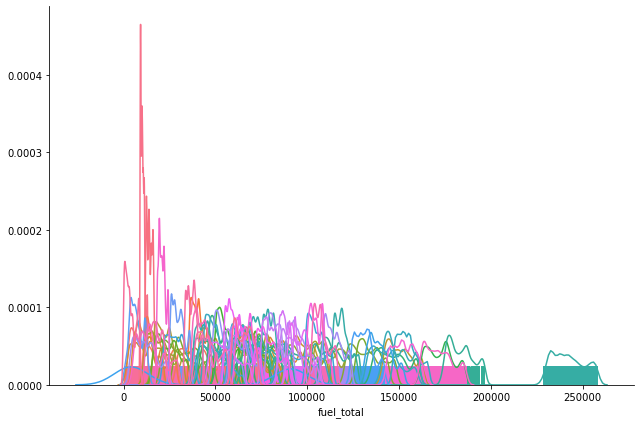

In [21]:
# Distribution of important features - plot

for i in ['fuel_total']:
    
    g = sns.FacetGrid(df[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

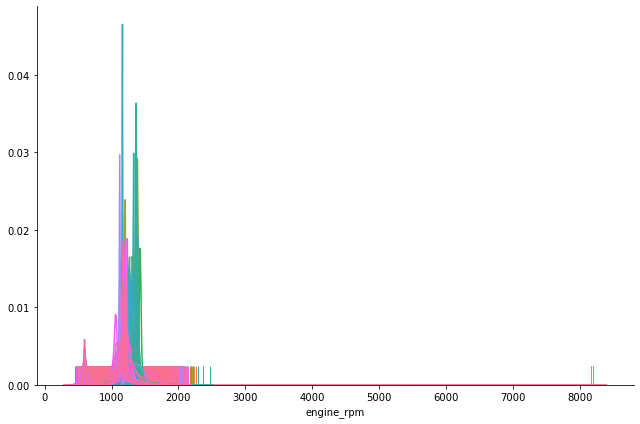

In [22]:
for i in ['engine_rpm']:
    
    g = sns.FacetGrid(df[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

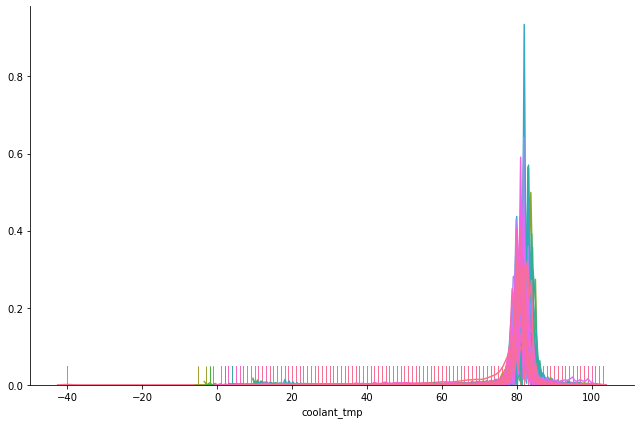

In [23]:
for i in ['coolant_tmp']:
    
    g = sns.FacetGrid(df[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

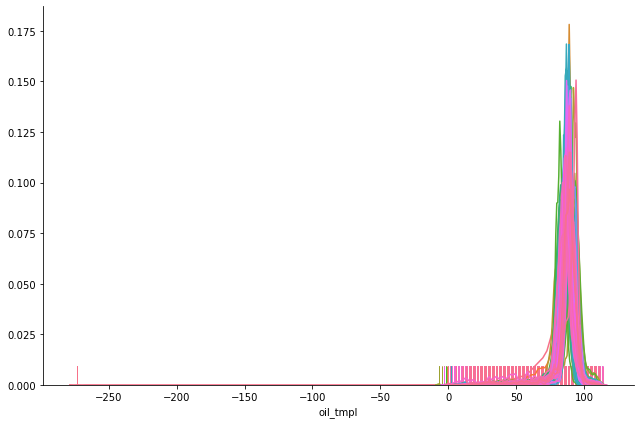

In [24]:
for i in ['oil_tmpl']:
    
    g = sns.FacetGrid(df[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

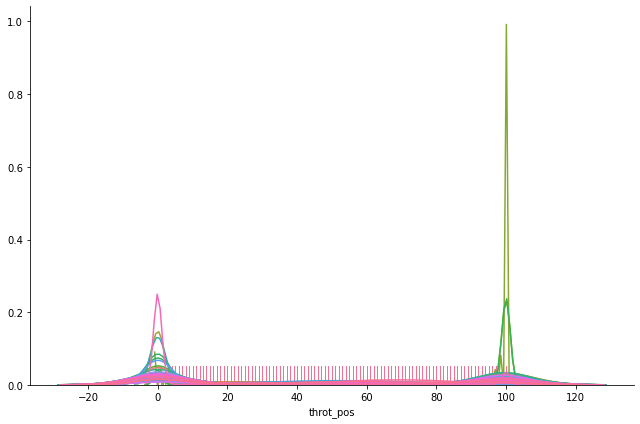

In [25]:
for i in ['throt_pos']:
    
    g = sns.FacetGrid(df[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

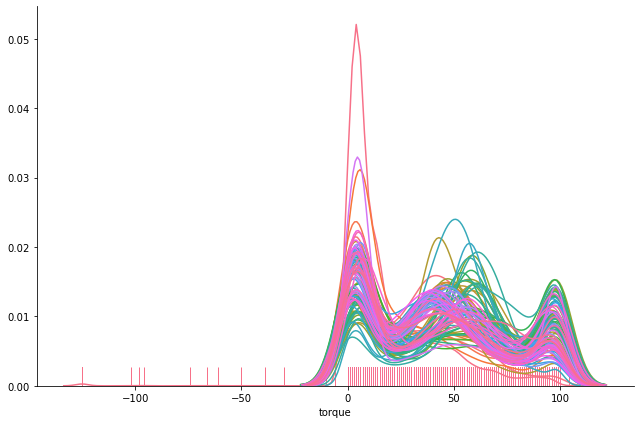

In [26]:
for i in ['torque']:
    
    g = sns.FacetGrid(df[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

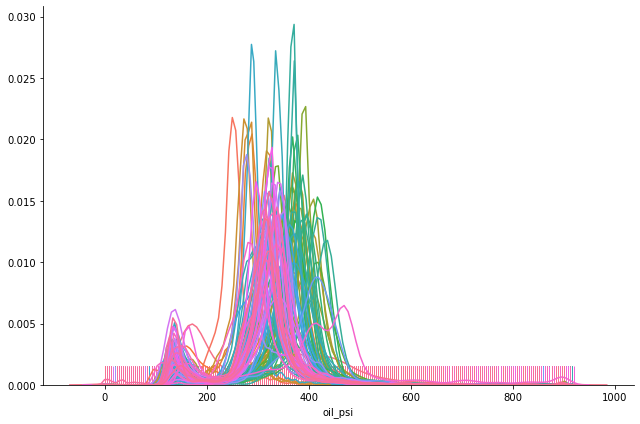

In [27]:
for i in ['oil_psi']:
    
    g = sns.FacetGrid(df[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

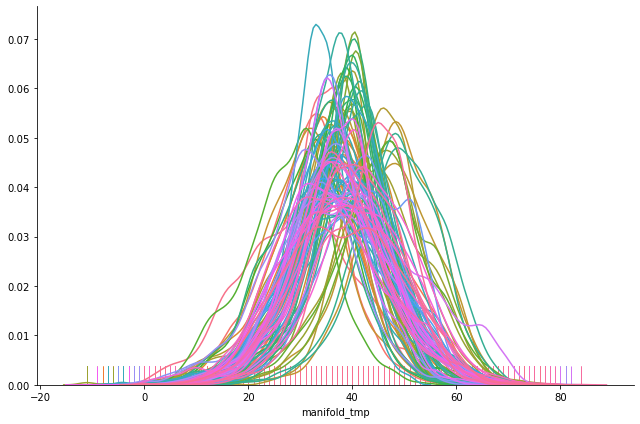

In [28]:
for i in ['manifold_tmp']:
    
    g = sns.FacetGrid(df[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

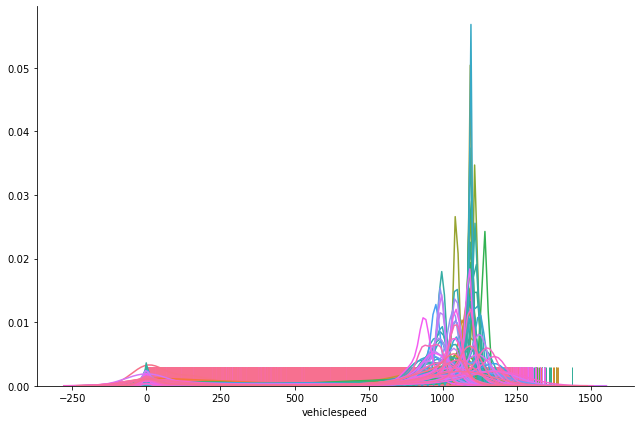

In [29]:
for i in ['vehiclespeed']:
    
    g = sns.FacetGrid(df[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

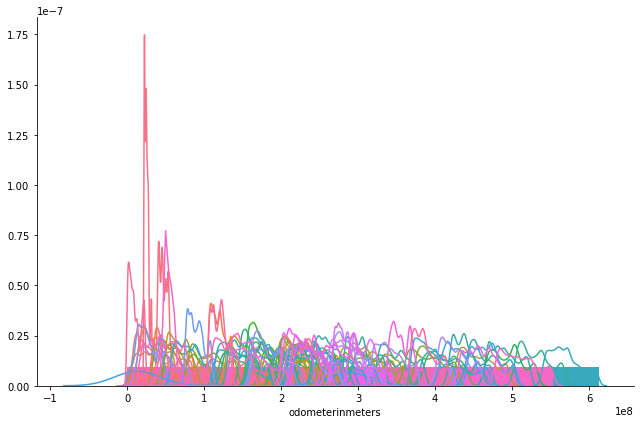

In [30]:
for i in ['odometerinmeters']:
    
    g = sns.FacetGrid(df[['vin',i]], hue="vin", height = 6, aspect = 1.5)
    g = (g.map(sns.distplot, i , hist=False, rug=True))
    plt.show()

    After meeting Dmitry confirmed only to use VIN.
    And only consider Xirgo type for now.

    Then suggested not to do any fill, use rows which are Non Nan.